<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction</a></span></li><li><span><a href="#The-Supervised-Learning-Paradigm" data-toc-modified-id="The-Supervised-Learning-Paradigm-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>The Supervised Learning Paradigm</a></span></li><li><span><a href="#Observation-and-Target-Encoding" data-toc-modified-id="Observation-and-Target-Encoding-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Observation and Target Encoding</a></span><ul class="toc-item"><li><span><a href="#One-Hot-Representation" data-toc-modified-id="One-Hot-Representation-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>One Hot Representation</a></span></li><li><span><a href="#TF-Representation" data-toc-modified-id="TF-Representation-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>TF Representation</a></span></li><li><span><a href="#TF-IDF-Representation" data-toc-modified-id="TF-IDF-Representation-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>TF-IDF Representation</a></span></li></ul></li><li><span><a href="#Computational-Graphs" data-toc-modified-id="Computational-Graphs-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Computational Graphs</a></span></li><li><span><a href="#PyTorch-Basics" data-toc-modified-id="PyTorch-Basics-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>PyTorch Basics</a></span><ul class="toc-item"><li><span><a href="#Creating-Tensors" data-toc-modified-id="Creating-Tensors-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Creating Tensors</a></span></li><li><span><a href="#Tensor-Types-&amp;-Size" data-toc-modified-id="Tensor-Types-&amp;-Size-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Tensor Types &amp; Size</a></span></li><li><span><a href="#Tensor-Operations" data-toc-modified-id="Tensor-Operations-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Tensor Operations</a></span></li><li><span><a href="#Indexing,-Slicing-&amp;-Joining" data-toc-modified-id="Indexing,-Slicing-&amp;-Joining-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>Indexing, Slicing &amp; Joining</a></span></li><li><span><a href="#Tensors-&amp;-Computational-Graphs" data-toc-modified-id="Tensors-&amp;-Computational-Graphs-5.5"><span class="toc-item-num">5.5&nbsp;&nbsp;</span>Tensors &amp; Computational Graphs</a></span></li><li><span><a href="#CUDA-Tensors" data-toc-modified-id="CUDA-Tensors-5.6"><span class="toc-item-num">5.6&nbsp;&nbsp;</span>CUDA Tensors</a></span></li></ul></li><li><span><a href="#Exercises" data-toc-modified-id="Exercises-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Exercises</a></span></li><li><span><a href="#Summary" data-toc-modified-id="Summary-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Summary</a></span></li></ul></div>

## Introduction

- **NLP** refers to a set of techniques involving application of statistical methods with or without insights from linguistics, to understand text for the sake of solving real world tasks.


- The **understanding** of text is mainly derived by transforming texts of useable computational **representations**, which are discrete or continous combinational structures such as vectors or tensors, graphs and trees.


- The learning of representation for a task from data(text) is the subject of **Machine Learning**.


- **Deep Learning** enables one to efficiently learn representations from data using an abstraction called the **computational graph** and numerical optimisation techniques.

## The Supervised Learning Paradigm

<img src="../images/figure1_1.png" />

Supervision in machine Learning or **supervised learning**, refers to cases where the ground truth for the *targets* is available for the *observations*. For example, in document classification, the _target is a categorical label_ and the _observation is a document_.


**Supervised Learning Paradigm concepts:**

- *Observations*: Sometimes refers to as _inputs_ and denoted as $ x $. These are items about which we want to predict something.
- *Targets*: Sometimes known as _ground truth_ and referred as $ y $. These are labels corresponding to an obvsevation and these are usually being predicted.
- *Model*: A mathematical functions that takes an observation $ x $ and predicts the value of its target label $ y $.
- *Parameters*: Also known as _weights_ parameterize the model. These are denoted by $ \hat w $. 
- *Predictions*: These are the values of the targets gussed by the model given the observations and also known as _estimates_. These are denoted as $ \hat y $.
- *Loss Function*: Loss function is used to compare how far off a prediction is from its target for observations in the training data. Given a target and its prediction, the loss function assigns a scalar real value called the _loss_. Lower the value of loss, the better the model is at predicting the target. Loss is denoted by $ L $.

Consider a dataset $ D = \{X_i, y_i\} ^ {n}_{i=1} $ with $ n $ examples. Given this dataset, we want to learn a function $ f $ parameterized by weights $ w $. We make an assumption about the structure of $ f $, and given that structure, the learned values of the weights $ w $ will fully characterize the model. For a given input $ X $, the model predicts $ \hat y $ as the target:

$$ \hat y = f(X, w) $$

In supervised learning, for training examples, we know the true target $ y $ for an observation. The loss for this instance will then be $ L(y, \hat y) $. Supervised learning then becomes a process of finding the optimal parameters/weights $ w $ that will minimize the cumulative loss for all the $ n $ examples.

## Observation and Target Encoding

In order to use Machine Learning Algorithms for Text observations, we need a method to represent these observations numerically. A simple way to represent text is a **numerical vector**.

![Figure 1.2](../images/figure1.2.png)

### One Hot Representation

The _one-hot representation_, as the name suggestes, starts with a zero vector and sets as 1 the corresponding entry in the vector if the word is present in the sentence or document.

Examples:
- _Time flies like an arrow._
- _Fruit flies like a banana._

![Figure 1.3](../images/figure1.3.png)

### TF Representation

The _TF representation_ of a phrase, sentence or document is simply the sum of the one-hot representations of its constituent wordas. TF of a word $ w $ is denoted by $ TF(w) $.

<AxesSubplot:>

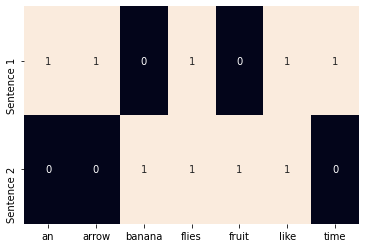

In [11]:
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns

corpus = [
    "Time flies flies like an arrow.",
    "Fruit flies like a banana."
]
one_hot_vectorizer = CountVectorizer(binary=True)
one_hot = one_hot_vectorizer.fit_transform(corpus).toarray()
sns.heatmap(
    one_hot, annot=True,
    cbar=False, xticklabels=sorted(list(one_hot_vectorizer.vocabulary_.keys())),
    yticklabels=['Sentence 1', 'Sentence 2']
)

### TF-IDF Representation

The _IDF(Inverse Document Frequency)_ penalizes common tokens and reward rare tokens in the vector represemtation. The _IDF(w)_ of a token w is defined with respect to a corpus as:

$$ IDF(w) = \log \frac {N}{n_w} $$
where $ n_w $ is the number of documents containing the word $ w $ and $ N $ is the total number of documents.

The _TF-IDF_ score is simply the product $ TF(w) * IDF(w) $.

Heuristic representations like TF-IDF are rarely used in Deep Learning as the goal is to learn such representation.

<AxesSubplot:>

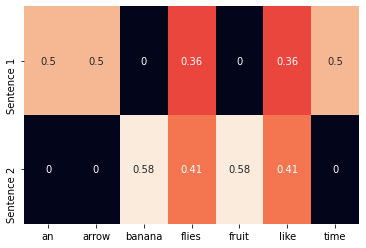

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(binary=True)
one_hot = tfidf_vectorizer.fit_transform(corpus).toarray()
sns.heatmap(
    one_hot, annot=True,
    cbar=False, xticklabels=sorted(list(tfidf_vectorizer.vocabulary_.keys())),
    yticklabels=['Sentence 1', 'Sentence 2']
)

## Computational Graphs

_Computational Graph_ is an abstraction that models mathematical expressions. Libraries like Theano, TensorFlow & PyTorch do additional book keeping to implement Automatic Differentiation needed to obtain gradients of parameters during training in the supervised learning paradigm.

[Seppo Linnainmaa](https://en.wikipedia.org/wiki/Seppo_Linnainmaa) first introduced the idea of automatic differentiation on computationl graphs as part of his 1970 master thesis. Variants of that became the foundation for modern deep learning frameworks like Theano, TensorFlow & PyTorch.

_Inference_ is simply expression evaluation. Consider following expressions

$$ y = wx + b $$

This can be writeen as two subexpressions, $ z = wx $ and $ y = z + b $. Then this can represented using a DAG(directed acyclic graph) in which nodes are the mathematical operations like multiplication & addition.

![Figure 1.4](../images/figure1.4.png)

## PyTorch Basics

PyTorch implements a tape based [automatic differentiation method](https://justindomke.wordpress.com/2009/03/24/a-simple-explanation-of-reverse-mode-automatic-differentiation/) that allows us to define and execute computational graphs dynamically.

_Tensor_ is a mathematical object holding some multidimensional data. A tensor of order zero is just a number or a _scalar_. A tensor of order one(1st ordet tensor) is an array of numbers, or a _vector_. Similarly, a 2nd order tensor is an array of vectors or a _matrix_.Hence tensor can be generalized as an _n-dimensioal_ array of scalars.

![Figure 1.5](../images/figure1.5.png)

### Creating Tensors

In [13]:
def describe(x):
    print(f"Type: {x.type()}")
    print(f"Shape/Size: {x.shape}")
    print(f"Values: \n{x}")

In [17]:
# Creating a tensor with torc.Tensor
import torch
describe(torch.Tensor(2, 3))

Type: torch.FloatTensor
Shape/Size: torch.Size([2, 3])
Values: 
tensor([[4.1911e+21, 1.2983e-11, 1.3399e-08],
        [2.1122e+20, 1.3107e-08, 5.1179e+22]])


In [18]:
# Creating a randomly initialized tensor

# Uniform random
describe(torch.rand(2, 3))

# random normal
describe(torch.randn(2, 3))

Type: torch.FloatTensor
Shape/Size: torch.Size([2, 3])
Values: 
tensor([[0.8576, 0.7484, 0.3410],
        [0.1979, 0.1658, 0.2336]])
Type: torch.FloatTensor
Shape/Size: torch.Size([2, 3])
Values: 
tensor([[-0.6241, -0.5137,  0.3788],
        [ 0.0450, -1.1730,  1.0697]])


In [20]:
# Creating a filled tensor
describe(torch.zeros(2, 3))
x = torch.ones(2, 3)
describe(x)

# Method with underscore refers to an in-place operation
x.fill_(5)
describe(x)

Type: torch.FloatTensor
Shape/Size: torch.Size([2, 3])
Values: 
tensor([[0., 0., 0.],
        [0., 0., 0.]])
Type: torch.FloatTensor
Shape/Size: torch.Size([2, 3])
Values: 
tensor([[1., 1., 1.],
        [1., 1., 1.]])
Type: torch.FloatTensor
Shape/Size: torch.Size([2, 3])
Values: 
tensor([[5., 5., 5.],
        [5., 5., 5.]])


In [21]:
# Creating and initializing a tensor from lists
x = torch.Tensor(
    [
        [1, 2, 3],
        [4, 5, 6]
    ]
)
describe(x)

Type: torch.FloatTensor
Shape/Size: torch.Size([2, 3])
Values: 
tensor([[1., 2., 3.],
        [4., 5., 6.]])


In [22]:
# Creating and initializing a tensor from NumPy
import numpy as np
npy = np.random.rand(2, 3)
describe(torch.from_numpy(npy))

Type: torch.DoubleTensor
Shape/Size: torch.Size([2, 3])
Values: 
tensor([[0.6170, 0.6025, 0.9243],
        [0.4747, 0.6294, 0.7599]], dtype=torch.float64)


### Tensor Types & Size

In [27]:
x = torch.FloatTensor(
    [
        [1, 2, 3],
        [4, 5, 6]
    ]
)
describe(x)
x = x.long()
describe(x)

Type: torch.FloatTensor
Shape/Size: torch.Size([2, 3])
Values: 
tensor([[1., 2., 3.],
        [4., 5., 6.]])
Type: torch.LongTensor
Shape/Size: torch.Size([2, 3])
Values: 
tensor([[1, 2, 3],
        [4, 5, 6]])


In [28]:
x = torch.tensor(
    [
        [1, 2, 3],
        [4, 5, 6]
    ]
)
describe(x)
x = x.float()
describe(x)

Type: torch.LongTensor
Shape/Size: torch.Size([2, 3])
Values: 
tensor([[1, 2, 3],
        [4, 5, 6]])
Type: torch.FloatTensor
Shape/Size: torch.Size([2, 3])
Values: 
tensor([[1., 2., 3.],
        [4., 5., 6.]])


### Tensor Operations

In [29]:
# Tensor Operations: addition
x = torch.randn(2, 3)
describe(x)
describe(torch.add(x, x))
describe(x + x)

Type: torch.FloatTensor
Shape/Size: torch.Size([2, 3])
Values: 
tensor([[-3.1600,  0.3143,  0.8178],
        [-0.7756,  0.2878,  0.1736]])
Type: torch.FloatTensor
Shape/Size: torch.Size([2, 3])
Values: 
tensor([[-6.3199,  0.6286,  1.6356],
        [-1.5512,  0.5756,  0.3472]])
Type: torch.FloatTensor
Shape/Size: torch.Size([2, 3])
Values: 
tensor([[-6.3199,  0.6286,  1.6356],
        [-1.5512,  0.5756,  0.3472]])


In [32]:
# Dimension Based Tensor Operations
x = torch.arange(6)
describe(x)
x = x.view(2, 3)
describe(x)
describe(torch.sum(x, dim=0))
describe(torch.sum(x, dim=1))

Type: torch.LongTensor
Shape/Size: torch.Size([6])
Values: 
tensor([0, 1, 2, 3, 4, 5])
Type: torch.LongTensor
Shape/Size: torch.Size([2, 3])
Values: 
tensor([[0, 1, 2],
        [3, 4, 5]])
Type: torch.LongTensor
Shape/Size: torch.Size([3])
Values: 
tensor([3, 5, 7])
Type: torch.LongTensor
Shape/Size: torch.Size([2])
Values: 
tensor([ 3, 12])


### Indexing, Slicing & Joining

In [33]:
# Slicing & Indexing a Tensor
x = torch.arange(6).view(2, 3)
describe(x)
describe(x[:1, :2])
describe(x[0, 1])

Type: torch.LongTensor
Shape/Size: torch.Size([2, 3])
Values: 
tensor([[0, 1, 2],
        [3, 4, 5]])
Type: torch.LongTensor
Shape/Size: torch.Size([1, 2])
Values: 
tensor([[0, 1]])
Type: torch.LongTensor
Shape/Size: torch.Size([])
Values: 
1


In [38]:
# Complex Indexing: Noncontiguous Indexing of a tensor
indices = torch.LongTensor([0, 2])
describe(indices)
describe(torch.index_select(x, dim=1, index=indices))

indices = torch.LongTensor([0, 0])
describe(indices)
describe(torch.index_select(x, dim=0, index=indices))

row_indices = torch.arange(2).long()
col_indices = torch.LongTensor([0, 1])
describe(row_indices)
describe(col_indices)
describe(x[row_indices, col_indices])

Type: torch.LongTensor
Shape/Size: torch.Size([2])
Values: 
tensor([0, 2])
Type: torch.LongTensor
Shape/Size: torch.Size([2, 2])
Values: 
tensor([[0, 2],
        [3, 5]])
Type: torch.LongTensor
Shape/Size: torch.Size([2])
Values: 
tensor([0, 0])
Type: torch.LongTensor
Shape/Size: torch.Size([2, 3])
Values: 
tensor([[0, 1, 2],
        [0, 1, 2]])
Type: torch.LongTensor
Shape/Size: torch.Size([2])
Values: 
tensor([0, 1])
Type: torch.LongTensor
Shape/Size: torch.Size([2])
Values: 
tensor([0, 1])
Type: torch.LongTensor
Shape/Size: torch.Size([2])
Values: 
tensor([0, 4])


In [39]:
# Concatenating Tensors
x = torch.arange(6).view(2, 3)
describe(x)
describe(torch.cat([x, x], dim=1))
describe(torch.cat([x, x], dim=0))
describe(torch.stack([x, x]))

Type: torch.LongTensor
Shape/Size: torch.Size([2, 3])
Values: 
tensor([[0, 1, 2],
        [3, 4, 5]])
Type: torch.LongTensor
Shape/Size: torch.Size([2, 6])
Values: 
tensor([[0, 1, 2, 0, 1, 2],
        [3, 4, 5, 3, 4, 5]])
Type: torch.LongTensor
Shape/Size: torch.Size([4, 3])
Values: 
tensor([[0, 1, 2],
        [3, 4, 5],
        [0, 1, 2],
        [3, 4, 5]])
Type: torch.LongTensor
Shape/Size: torch.Size([2, 2, 3])
Values: 
tensor([[[0, 1, 2],
         [3, 4, 5]],

        [[0, 1, 2],
         [3, 4, 5]]])


In [42]:
# Linear Algebra on Tensors: Multiplication

x1 = torch.arange(6).view(2, 3)
describe(x1)
x2 = torch.ones(3, 2)
x2[:, 1] += 1
describe(x2)
describe(torch.mm(x1, x2.long()))

Type: torch.LongTensor
Shape/Size: torch.Size([2, 3])
Values: 
tensor([[0, 1, 2],
        [3, 4, 5]])
Type: torch.FloatTensor
Shape/Size: torch.Size([3, 2])
Values: 
tensor([[1., 2.],
        [1., 2.],
        [1., 2.]])
Type: torch.LongTensor
Shape/Size: torch.Size([2, 2])
Values: 
tensor([[ 3,  6],
        [12, 24]])


### Tensors & Computational Graphs

Gradient is a value that represents the slope of a function output with respect to the function input.

In [52]:
# Creating tensors for gradient bookkeeping
x = torch.ones(2, 2, requires_grad=True)
describe(x)
print(x.grad)

y = (x + 2) * (x + 5) + 3
describe(y)
print(x.grad)

z = y.mean()
describe(z)
z.backward()
print(x.grad)

Type: torch.FloatTensor
Shape/Size: torch.Size([2, 2])
Values: 
tensor([[1., 1.],
        [1., 1.]], requires_grad=True)
None
Type: torch.FloatTensor
Shape/Size: torch.Size([2, 2])
Values: 
tensor([[21., 21.],
        [21., 21.]], grad_fn=<AddBackward0>)
None
Type: torch.FloatTensor
Shape/Size: torch.Size([])
Values: 
21.0
tensor([[2.2500, 2.2500],
        [2.2500, 2.2500]])


### CUDA Tensors

In [58]:
# Creating CUDA Tensors
print(torch.cuda.is_available())
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)
x = torch.rand(3, 3).to(device)
describe(x)

False
cpu
Type: torch.FloatTensor
Shape/Size: torch.Size([3, 3])
Values: 
tensor([[0.1819, 0.0941, 0.2468],
        [0.0304, 0.7735, 0.5676],
        [0.6932, 0.5248, 0.4273]])


In [59]:
# Mixing CUDA tensors with CPU bound tensors
y = torch.rand(3, 3)
x + y

tensor([[1.1622, 0.8481, 1.1289],
        [0.6761, 1.2577, 1.1936],
        [1.5976, 1.1787, 1.3901]])

In [60]:
y = y.to(device)
x = x.to(device)
x + y

tensor([[1.1622, 0.8481, 1.1289],
        [0.6761, 1.2577, 1.1936],
        [1.5976, 1.1787, 1.3901]])

## Exercises

In [65]:
# 1. Create a 2D tensor and then add a dimension of size 1 inserted at dimension 0.

x = torch.rand(3, 3)
describe(x)
a = x.unsqueeze(0)
describe(x)
describe(a)

Type: torch.FloatTensor
Shape/Size: torch.Size([3, 3])
Values: 
tensor([[0.9948, 0.2192, 0.2748],
        [0.5520, 0.3972, 0.0348],
        [0.3086, 0.8186, 0.6221]])
Type: torch.FloatTensor
Shape/Size: torch.Size([3, 3])
Values: 
tensor([[0.9948, 0.2192, 0.2748],
        [0.5520, 0.3972, 0.0348],
        [0.3086, 0.8186, 0.6221]])
Type: torch.FloatTensor
Shape/Size: torch.Size([1, 3, 3])
Values: 
tensor([[[0.9948, 0.2192, 0.2748],
         [0.5520, 0.3972, 0.0348],
         [0.3086, 0.8186, 0.6221]]])


In [70]:
# 2. Remove the extra dimension you just added to the previous tensor.

a = a.squeeze(0)
describe(a)

Type: torch.FloatTensor
Shape/Size: torch.Size([3, 3])
Values: 
tensor([[0.9948, 0.2192, 0.2748],
        [0.5520, 0.3972, 0.0348],
        [0.3086, 0.8186, 0.6221]])


In [71]:
# 3. Create a random tensor of shape 5x3 in the interval [3, 7)

describe(3 + torch.rand(5, 3) * (7 - 3))

Type: torch.FloatTensor
Shape/Size: torch.Size([5, 3])
Values: 
tensor([[6.1084, 4.5564, 6.2045],
        [6.2692, 5.9804, 4.6833],
        [3.1471, 4.1873, 3.7031],
        [6.0901, 6.8825, 3.7219],
        [6.9564, 3.1241, 4.5057]])


In [72]:
# 4. Create a tensor with values from a normal distribution (mean=0, std=1).

a = torch.rand(3, 3)
describe(a)
a.normal_()
describe(a)

Type: torch.FloatTensor
Shape/Size: torch.Size([3, 3])
Values: 
tensor([[0.1263, 0.0134, 0.6546],
        [0.9368, 0.0811, 0.2582],
        [0.4380, 0.6274, 0.4826]])
Type: torch.FloatTensor
Shape/Size: torch.Size([3, 3])
Values: 
tensor([[ 0.3927, -1.3650, -1.3759],
        [ 0.3783,  1.0076,  0.2306],
        [-0.1471,  0.0136,  0.5349]])


In [78]:
# 5. Retrieve the indexes of all the nonzero elements in the tensor torch.Tensor([1, 1, 1, 0, 1]).

a = torch.Tensor([1, 1, 1, 0, 1])
describe(a)
describe(a.nonzero())

Type: torch.FloatTensor
Shape/Size: torch.Size([5])
Values: 
tensor([1., 1., 1., 0., 1.])
Type: torch.LongTensor
Shape/Size: torch.Size([4, 1])
Values: 
tensor([[0],
        [1],
        [2],
        [4]])


In [81]:
# 6. Create a random tensor of size (3,1) and then horizontally stack four copies together.

a = torch.rand(3, 1)
describe(a)
describe(a.expand(3, 4))

Type: torch.FloatTensor
Shape/Size: torch.Size([3, 1])
Values: 
tensor([[0.1885],
        [0.9197],
        [0.2011]])
Type: torch.FloatTensor
Shape/Size: torch.Size([3, 4])
Values: 
tensor([[0.1885, 0.1885, 0.1885, 0.1885],
        [0.9197, 0.9197, 0.9197, 0.9197],
        [0.2011, 0.2011, 0.2011, 0.2011]])


In [89]:
# 7. Return the batch matrix-matrix product of two three-dimensional matrices (a=torch.rand(3,4,5), b=torch.rand(3,5,4)).

a = torch.rand(3, 4, 5)
b = torch.rand(3, 5, 4)
describe(a)
describe(b)
describe(torch.bmm(a, b))

Type: torch.FloatTensor
Shape/Size: torch.Size([3, 4, 5])
Values: 
tensor([[[0.3564, 0.1567, 0.9715, 0.0778, 0.2263],
         [0.9015, 0.1654, 0.2525, 0.4174, 0.4270],
         [0.5057, 0.8296, 0.9204, 0.0790, 0.2932],
         [0.9185, 0.9262, 0.1190, 0.9915, 0.9216]],

        [[0.1639, 0.1751, 0.1474, 0.8851, 0.8939],
         [0.2789, 0.7392, 0.6716, 0.3847, 0.8202],
         [0.0227, 0.0124, 0.9194, 0.8144, 0.5921],
         [0.9525, 0.9549, 0.0662, 0.1525, 0.1277]],

        [[0.9203, 0.7173, 0.6867, 0.1012, 0.1112],
         [0.6357, 0.2192, 0.2895, 0.2133, 0.8876],
         [0.3152, 0.2038, 0.1371, 0.1724, 0.6423],
         [0.3159, 0.6188, 0.8418, 0.4031, 0.8775]]])
Type: torch.FloatTensor
Shape/Size: torch.Size([3, 5, 4])
Values: 
tensor([[[0.7862, 0.1557, 0.8397, 0.6308],
         [0.0601, 0.5460, 0.2286, 0.7408],
         [0.1278, 0.8643, 0.9329, 0.2279],
         [0.2715, 0.4812, 0.1460, 0.2860],
         [0.2923, 0.7213, 0.2361, 0.5052]],

        [[0.5088, 0.4569, 0.081

In [91]:
# 8. Return the batch matrix-matrix product of a 3D matrix and a 2D matrix (a=torch.rand(3,4,5), b=torch.rand(5,4)).

a = torch.rand(3, 4, 5)
b = torch.rand(5, 4)
describe(a)
describe(b)
describe(torch.bmm(a, b.unsqueeze(0).expand(a.size(0), *b.size())))

Type: torch.FloatTensor
Shape/Size: torch.Size([3, 4, 5])
Values: 
tensor([[[0.5307, 0.8954, 0.3231, 0.0083, 0.6625],
         [0.0679, 0.2234, 0.6733, 0.4813, 0.3997],
         [0.5609, 0.9456, 0.8110, 0.3193, 0.5541],
         [0.5484, 0.4430, 0.4566, 0.4791, 0.2792]],

        [[0.8887, 0.7611, 0.3875, 0.8849, 0.0490],
         [0.8606, 0.4816, 0.3886, 0.0110, 0.7618],
         [0.9859, 0.5685, 0.1761, 0.7831, 0.4973],
         [0.5241, 0.1780, 0.7988, 0.7058, 0.5777]],

        [[0.1751, 0.6022, 0.5638, 0.2586, 0.7211],
         [0.8273, 0.4658, 0.0716, 0.5146, 0.9314],
         [0.2133, 0.4027, 0.4810, 0.0385, 0.9646],
         [0.4136, 0.7462, 0.3778, 0.2873, 0.4125]]])
Type: torch.FloatTensor
Shape/Size: torch.Size([5, 4])
Values: 
tensor([[0.9210, 0.5668, 0.7346, 0.3976],
        [0.3458, 0.3803, 0.1340, 0.1006],
        [0.8108, 0.1976, 0.1804, 0.5371],
        [0.4929, 0.6887, 0.7709, 0.1628],
        [0.3428, 0.8578, 0.2044, 0.2830]])
Type: torch.FloatTensor
Shape/Size: torc